# 실습설명
화장품 이커머스 데이터 분석을 통해, 고객의 이탈율을 낮추고 구매 전환율을 높이는 것이 목표

# 데이터 설명

- event_time : 이벤트가 발생한 시간
- event_type : 이벤트 유형(구매)
- product_id : 제품ID
- category_id : 제품의 카테고리 ID
- category_code : 제품의 카테고리 코드 (의미있는 카테고리의 경우 존재)
- brand : 브랜드 이름 (소문자, 생략될 수 있음)
- price : 제품의 가격
- user_id : 사용자 ID
- user_session : 사용자 세션 ID(임시, 세션마다 변경됨)

In [31]:
import pandas as pd
df  = pd.read_csv("/Users/jangminseul/Desktop/ecommerce/data/raw/cosmetic.csv")
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,NaN,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5


### 전처리

In [32]:
print(df.shape) # 데이터 개수
print(df.info()) # 컬럼별 타입

(3533286, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3533286 entries, 0 to 3533285
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 242.6+ MB
None


In [119]:
df_raw = df.copy() # 타입변환 데이터
df_raw['event_time'] = pd.to_datetime(df_raw['event_time']) # 데이터 타입 변환
df_raw['event_time'].dtype

df_clean = df_raw.copy() # 전처리용


In [120]:
df_clean.duplicated().sum() # 중복데이터 확인

183860

중복 데이터 원인
- 같은 행동이 동시에 여러번 기록
- 초 단위 timestamp
- 세션 로그 특성

In [121]:
df_clean.duplicated().sum()/len(df_clean) # 중복 데이터 비율 확인

0.052036546149957855

In [122]:
df_clean[df_clean.duplicated()].head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
37,2019-12-01 00:01:52+00:00,cart,5700046,1487580009286598681,NaN,runail,0.40,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
55,2019-12-01 00:02:49+00:00,cart,5693501,1487580009445982239,NaN,NaN,0.60,579751441,8de492d7-0937-47ae-be2c-a7615aec2b0d
61,2019-12-01 00:03:08+00:00,remove_from_cart,5859482,1487580005671109489,NaN,masura,1.60,561162056,39cf2227-03ed-421e-9615-7814b9b3c5e6
62,2019-12-01 00:03:08+00:00,remove_from_cart,5839671,1487580005671109489,NaN,masura,2.19,561162056,39cf2227-03ed-421e-9615-7814b9b3c5e6
66,2019-12-01 00:03:10+00:00,remove_from_cart,5859482,1487580005671109489,NaN,masura,1.60,561162056,39cf2227-03ed-421e-9615-7814b9b3c5e6


In [123]:
df_clean.duplicated(subset=['user_id','event_time','product_id','event_type']).sum()

185220

In [124]:
df_clean.drop_duplicates(subset=['user_id','event_time','product_id','event_type'])  # 어떤 종류인지 확인
df_clean = df_clean.drop_duplicates(subset=['user_id','event_time','product_id','event_type']) # 같은 사용자가, 같은 시점에, 같은 상품에 대해 같은 행동을 여러번 기록 한 경우로 바라보고 분석하기 위함

In [125]:
print(len(df_clean))
df_clean.duplicated(subset=['user_id','event_time','product_id','event_type']).sum() # 제거확인

3348066


0

In [126]:
print(df_clean.isnull().sum()) # 결측치 확인
(df_clean.isnull().sum()/len(df_clean))*100  # 결측치 비율 확인

event_time             0
event_type             0
product_id             0
category_id            0
category_code    3291359
brand            1427640
price                  0
user_id                0
user_session         714
dtype: int64


event_time        0.000000
event_type        0.000000
product_id        0.000000
category_id       0.000000
category_code    98.306276
brand            42.640736
price             0.000000
user_id           0.000000
user_session      0.021326
dtype: float64

In [127]:
df_clean = df_clean.drop('category_code', axis= 1)

In [132]:
df_clean.isnull().sum()

event_time            0
event_type            0
product_id            0
category_id           0
brand           1420713
price                 0
user_id               0
user_session        714
dtype: int64

In [134]:
df_feat = df_clean.copy() # 브랜드 전처리용
df_feat['brand'] = (df_feat.groupby('product_id')['brand'].transform(lambda x : x.ffill().bfill()))

/var/folders/k6/bbfv75wn1_x_knw1l7grxc7w0000gn/T/ipykernel_845/626176034.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_feat['brand'] = (df_feat.groupby('product_id')['brand'].transform(lambda x : x.ffill().bfill()))


In [135]:
(df_feat.isnull().sum()/len(df_feat))*100

event_time       0.000000
event_type       0.000000
product_id       0.000000
category_id      0.000000
brand           42.433841
price            0.000000
user_id          0.000000
user_session     0.021326
dtype: float64

In [136]:
df_feat['brand'] = df_feat['brand'].fillna("Unknown")
df_feat.isna().sum()


event_time        0
event_type        0
product_id        0
category_id       0
brand             0
price             0
user_id           0
user_session    714
dtype: int64

In [146]:
df_user = df_feat.copy()
df_user['user_session'] = df_user['user_session'].fillna("N/A") # 사용자 기준 분석용

df_user_session = df_clean.copy()
df_user_session = df_user_session.dropna(subset=['user_session']) # 세션 기준 분석용

### 데이터 분석_사용자기반
- df_user.groupby(['user_id','event_type]).size()  #유저 기준
- df_user_session.groupby(['user_session','event_type]).size #방문 단위 전환율 계산


In [43]:
df_user['price'].describe() # 수치 분포 확인

count    3.348066e+06
mean     9.079971e+00
std      2.024615e+01
min     -7.937000e+01
25%      2.060000e+00
50%      4.270000e+00
75%      7.140000e+00
max      3.277800e+02
Name: price, dtype: float64

In [149]:
df_user[df_user['price'] < 0].shape # (17,9)
(df_user['price'] < 0).mean()
df_user[df_user['price'] < 0].head()
df_user[df_user['price'] < 0]['event_type'].value_counts() # 17

event_type
purchase    17
Name: count, dtype: int64

In [150]:
df_user = df_user[df_user['price'] >= 0]

In [151]:
df_user['event_type'].value_counts() 
# 퍼널 구조 view -> cart -> purchase
# 중간 이탈 remove_from_cart

event_type
view                1726861
cart                 911641
remove_from_cart     496498
purchase             213049
Name: count, dtype: int64

In [170]:
# 단계별 전환율
view = (df_user['event_type'] == 'view').sum()
cart = (df_user['event_type'] == 'cart').sum()
remove_from_cart = (df_user['event_type'] == 'remove_from_cart').sum()
purchase = (df_user['event_type'] == 'purchase').sum()

view_to_cart = cart / view
cart_to_purchase = purchase / cart
view_to_purchase = purchase / view
remove_rate = remove_from_cart/cart

print(f"view_to_cart : " , view_to_cart)
print(f"cart_to_purchase : " , cart_to_purchase)
print(f"view_to_purchase : " , view_to_purchase)
print(f"remove_rate : " , remove_rate)

view_to_cart :  0.527917996874097
cart_to_purchase :  0.233698352750699
view_to_purchase :  0.12337356625692514
remove_rate :  0.544620086196211


In [156]:
# 가격 구간 생성
df_processed_user = df_user.copy()
df_processed_user['price_bin'] = pd.qcut(df_processed_user['price'],q=4, labels= ['Q1','Q2','Q3','Q4'])  # 가격 데이터 4등분
df_processed_user['price_bin'].value_counts()

price_bin
Q2    838318
Q1    837288
Q3    836360
Q4    836083
Name: count, dtype: int64

In [171]:
# 가격 구간별 전환율 분석
funnel_df = df_processed_user[df_processed_user['event_type'].isin(['view','cart','purchase','remove_from_cart'])].copy()
price_user_funnel = (funnel_df.groupby(['price_bin','user_id','event_type']).size().unstack(fill_value=0).reset_index())

# True/False 변환
for col in ['view','cart','purchase','remove_from_cart'] :
    price_user_funnel[col] = price_user_funnel[col] > 0

price_summary = (price_user_funnel.groupby('price_bin')[['view','cart','purchase','remove_from_cart']].sum())
price_summary['view_to_cart'] = price_summary['cart']/price_summary['view']
price_summary['cart_to_purchase'] = price_summary['purchase']/price_summary['cart']
price_summary['view_to_purchase'] = price_summary['purchase']/price_summary['view']
price_summary['remove_rate'] = price_summary['remove_from_cart']/price_summary['cart']



/var/folders/k6/bbfv75wn1_x_knw1l7grxc7w0000gn/T/ipykernel_845/1712892822.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_user_funnel = (funnel_df.groupby(['price_bin','user_id','event_type']).size().unstack(fill_value=0).reset_index())
/var/folders/k6/bbfv75wn1_x_knw1l7grxc7w0000gn/T/ipykernel_845/1712892822.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_summary = (price_user_funnel.groupby('price_bin')[['view','cart','purchase','remove_from_cart']].sum())


<Axes: xlabel='price_bin'>

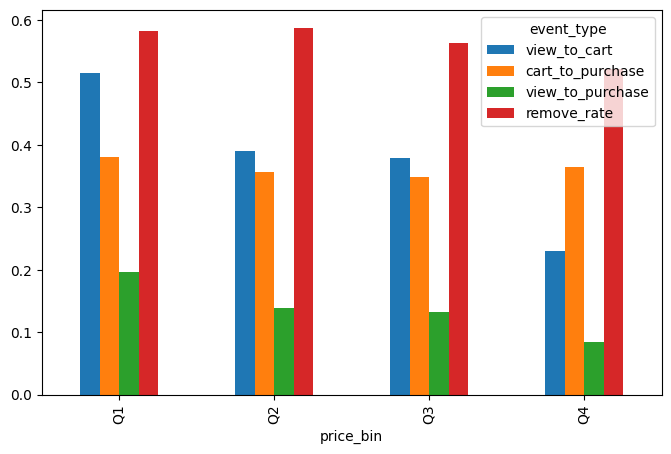

In [173]:
import matplotlib.pyplot as plt
price_summary[['view_to_cart','cart_to_purchase','view_to_purchase','remove_rate']].plot(kind='bar',figsize=(8,5))